Import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

Load and preprocess MNIST dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images to [0,1]
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Define common parameters

In [3]:
input_dim = 28 * 28  # 784 pixels
encoding_dim = 64    # Latent space size

1. Weight Decay (L2 Regularization) Autoencoder


    Formula: Loss = ||X - X'||^2 + λ||W||^2
    L2 regularization prevents overfitting by penalizing large weights

In [4]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=l2(1e-4))(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
l2_autoencoder = Model(input_layer, decoded)
l2_autoencoder.compile(optimizer='adam', loss='mse')
l2_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 0.2312 - val_loss: 0.1929
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1846 - val_loss: 0.1631
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1545 - val_loss: 0.1230
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1162 - val_loss: 0.1041
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1001 - val_loss: 0.0935
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0884 - val_loss: 0.0838
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0810 - val_loss: 0.0787
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0767 - val_loss: 0.0754
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0738 - val_loss: 0.0729
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0717 - val_loss: 0.0709


2. Denoising Autoencoder


    Formula: Loss = ||X - X'||^2 where X' is the reconstructed noise-free version of X
    Denoising autoencoders learn to remove noise from inputs

In [5]:
input_layer = Input(shape=(input_dim,))
noisy_input = GaussianNoise(0.2)(input_layer)
encoded = Dense(encoding_dim, activation='relu')(noisy_input)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
denoising_autoencoder = Model(input_layer, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='mse')
denoising_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0984 - val_loss: 0.0324
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0302 - val_loss: 0.0210
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0210 - val_loss: 0.0154
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0163 - val_loss: 0.0119
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0133 - val_loss: 0.0096
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0113 - val_loss: 0.0080
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0098 - val_loss: 0.0069
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0089 - val_loss: 0.0062
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0082 - val_loss: 0.0057
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0078 - val_loss: 0.0053


3. Sparse Autoencoder


    Formula: Loss = ||X - X'||^2 + λ Σ |h|
    Sparse autoencoders encourage sparsity in the hidden layer activations

In [6]:
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=tf.keras.regularizers.l1(1e-5))(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
sparse_autoencoder = Model(input_layer, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='mse')
sparse_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2080 - val_loss: 0.1004
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0953 - val_loss: 0.0832
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0808 - val_loss: 0.0752
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0739 - val_loss: 0.0709
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0701 - val_loss: 0.0686
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0680 - val_loss: 0.0669
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0666 - val_loss: 0.0657
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0655 - val_loss: 0.0648
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0644 - val_loss: 0.0640
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0638 - val_loss: 0.0633


4. Contractive Autoencoder


    Formula: Loss = ||X - X'||^2 + λ Σ ||∇h||^2
    Contractive autoencoders penalize the derivative of the hidden representation to enforce robustness

In [7]:
lambda_reg = 1e-3
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
contractive_autoencoder = Model(input_layer, decoded)

# Custom loss function for contractive penalty
def contractive_loss(y_true, y_pred):
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    W = contractive_autoencoder.layers[1].weights[0]  # Encoder weights
    h = contractive_autoencoder.layers[1](input_layer)
    contractive_penalty = lambda_reg * tf.reduce_sum(tf.square(W))
    return mse_loss + contractive_penalty

contractive_autoencoder.compile(optimizer='adam', loss=contractive_loss)
contractive_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1484 - val_loss: 0.0510
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0486 - val_loss: 0.0414
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0402 - val_loss: 0.0357
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0352 - val_loss: 0.0317
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0314 - val_loss: 0.0289
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0288 - val_loss: 0.0268
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0269 - val_loss: 0.0251
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0253 - val_loss: 0.0238
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0240 - val_loss: 0.0226
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0228 - val_loss: 0.0216


Function to visualize original and reconstructed images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


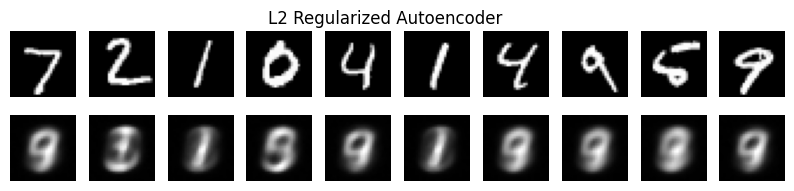

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


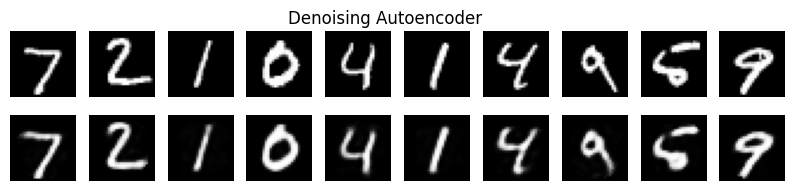

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


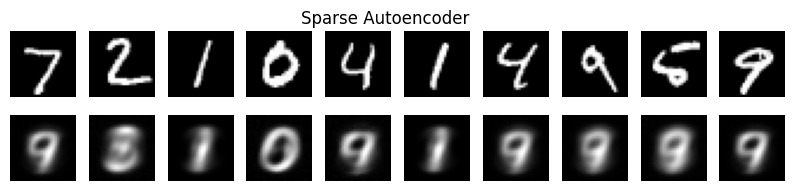

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


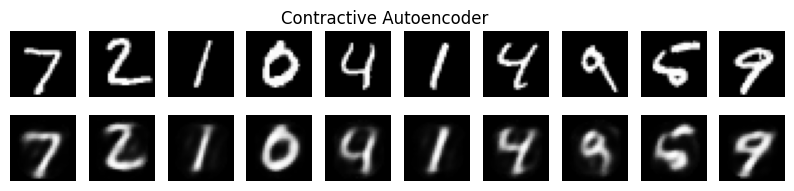

In [8]:
def visualize_results(model, x_test, title):
    decoded_imgs = model.predict(x_test[:10])
    plt.figure(figsize=(10, 2))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.subplot(2, 10, i + 11)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize reconstructions
visualize_results(l2_autoencoder, x_test, 'L2 Regularized Autoencoder')
visualize_results(denoising_autoencoder, x_test, 'Denoising Autoencoder')
visualize_results(sparse_autoencoder, x_test, 'Sparse Autoencoder')
visualize_results(contractive_autoencoder, x_test, 'Contractive Autoencoder')

Edge Detection using Sparse Autoencoder

    Sparse autoencoders can be used for edge detection by capturing high-frequency details

    A feature map in the context of autoencoders and edge detection refers to the output of
    a hidden layer (often the bottleneck or encoding layer) that captures important spatial
    and structural information from the input data.
    These feature maps highlight key patterns, edges, and textures in images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


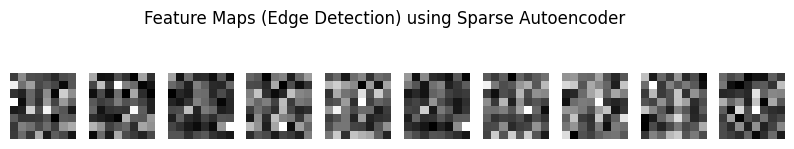

In [9]:
encoded_model = Model(input_layer, encoded)
encoded_imgs = encoded_model.predict(x_test[:10])
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(encoded_imgs[i].reshape(8, 8), cmap='gray')  # Encoding layer has 64 neurons, reshaped to 8x8
    plt.axis('off')
plt.suptitle('Feature Maps (Edge Detection) using Sparse Autoencoder')
plt.show()

Summary:

    1. L2 Regularization reduces overfitting by penalizing large weights.
    2. Denoising Autoencoder learns noise-free representations.
    3. Sparse Autoencoder enforces sparsity and can extract edges.
    4. Contractive Autoencoder enforces robustness by penalizing hidden activations' derivatives.
    5. Sparse Autoencoder can perform edge detection as it learns sparse high-level features.
